In [43]:
import pandas as pd
import numpy as np
# Import XLSX file
fert = pd.read_csv(r"E:\nutrient transport\revision_data\plots\saving\nutrient_input.csv")
yield_rice= pd.read_csv(r"E:\nutrient transport\revision_data\plots\saving\rice_yield_2009_2020.csv")# kg/hec
yield_wheat= pd.read_csv(r"E:\nutrient transport\revision_data\plots\saving\Wheat_yield_2020_2009.csv")
wheat_trade_qtl= pd.read_csv(r"E:\nutrient transport\revision_data\nutrient_input\wheat_trade_quintal.csv")
rice_trade_qtl= pd.read_csv(r"E:\nutrient transport\revision_data\nutrient_input\rice_trade_qtl.csv")

In [44]:
# Drop columns 
rice_trade_qtl = rice_trade_qtl.drop(columns=['ID', 'source_ab', 'target_ab', 'con', 'source_id',
       'target_id', 'Agg_volume'])
wheat_trade_qtl = wheat_trade_qtl.drop(columns=['ID', 'con', 'source_id',
       'target_id'])

In [45]:
# Unpivot the dataframe
unpivoted_df_wheat_qtl = pd.melt(wheat_trade_qtl, id_vars=['source', 'target'],
                       var_name='Year', value_name='wheat_trade_qtl')
unpivoted_df_Rice_qtl = pd.melt(rice_trade_qtl, id_vars=['source', 'target'],
                       var_name='Year', value_name='Rice_trade_qtl')

In [46]:
# Drop columns 'gender' and 'income'
fert = fert.drop(columns=['Unnamed: 0', 'atm_depo', 'N_applied(kg/ha)',
       'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)',
       'Nitrogen_applied_manure(kg/ha)', 'phosphorous_applied_manure(kg/ha)',
       'potash_applied_manure(kg/ha)', 'nitro_footprint_fert_man(kg/ha)',
       'P_foot_fert_manure(kg/ha)', 'k_footprint_fert_manure(kg/ha)', 'bnf',])

In [47]:
df=fert

In [48]:
# Make all the values in the 'education' column uppercase
df['State'] = df['State'].str.upper()

In [49]:
#matching the names 

df['State']= df['State'].replace('CHHATTISGARH', 'CHATTISGARH')
df['State']= df['State'].replace('ANDAMAN AND NICOBAR', 'ANDAMAN & NICOBAR ISLANDS')
df['State']= df['State'].replace('DADRA AND NAGAR HAVELI', 'DADRA & NAGAR HAVELI')
df['State']= df['State'].replace('DAMAN AND DIU', 'DAMAN & DIU')
df['State']= df['State'].replace('JAMMU AND KASHMIR', 'JAMMU & KASHMIR')
df['State']= df['State'].replace('LAKSHADWEEP', 'LAKSHADEEP')
df['State']= df['State'].replace('ORISSA', 'ODISHA')
df['State']= df['State'].replace('UTTARANCHAL', 'UTTARAKHAND')

In [50]:
df['nitro_footprint_complete(kg/hec)'] = df['nitro_footprint_complete(kg/hec)'].astype('float64')

In [51]:
cropss = [ 'Paddy']
Rice_data= df[df['Crop'].isin(cropss)]  #  footprint for rice footprint data 

In [52]:
crops = [ 'Wheat']
wheat_data= df[df['Crop'].isin(crops)]#  footprint for wheat footprint data 

In [53]:
#unpivot rice yield kg/ha agricstat
rice_yield_un = pd.melt(yield_rice, id_vars=['State/Union Territory'],
                       var_name='Year', value_name='rice_yield_kg_ha')

In [54]:
del yield_wheat['state']
wheat_yield_un = pd.melt(yield_wheat, id_vars=['State/Union Territory'],
                       var_name='Year', value_name='wheat_yield_kg_ha')

In [55]:
# Create a new column with default value   based on source
unpivoted_df_Rice_qtl['rice_yield_kg_ha_source'] = 0

# Iterate over each row in the dataframe
for index, row in unpivoted_df_Rice_qtl.iterrows():
    state = row['source']
    year = row['Year']
    
    # Check if the source matches the State/Union Territory and year is the same
    if ((rice_yield_un['State/Union Territory'] == state).any()) and ((rice_yield_un['Year'] == year).any()):
    # Rest of the code
        # Get the rice_yield_kg_ha value from the rice_yield dataframe
        rice_yield_value = rice_yield_un.loc[(rice_yield_un['State/Union Territory'] == state) & (rice_yield_un['Year'] == year), 'rice_yield_kg_ha'].values[0]
        
        # Assign the rice_yield_kg_ha value to the corresponding row in the new column
        unpivoted_df_Rice_qtl.at[index, 'rice_yield_kg_ha_source'] = rice_yield_value


In [56]:
# Create a new column with default value   based on target
unpivoted_df_Rice_qtl['rice_yield_kg_ha_target'] = 0

# Iterate over each row in the dataframe
for index, row in unpivoted_df_Rice_qtl.iterrows():
    state = row['target']
    year = row['Year']
    
    # Check if the source matches the State/Union Territory and year is the same
    if ((rice_yield_un['State/Union Territory'] == state).any()) and ((rice_yield_un['Year'] == year).any()):
    # Rest of the code
        # Get the rice_yield_kg_ha value from the rice_yield dataframe
        rice_yield_value = rice_yield_un.loc[(rice_yield_un['State/Union Territory'] == state) & (rice_yield_un['Year'] == year), 'rice_yield_kg_ha'].values[0]
        
        # Assign the rice_yield_kg_ha value to the corresponding row in the new column
        unpivoted_df_Rice_qtl.at[index, 'rice_yield_kg_ha_target'] = rice_yield_value

In [57]:
# Create a new column with default value   based on target  for wheat
unpivoted_df_wheat_qtl['wheat_yield_kg_ha_target'] = 0

# Iterate over each row in the dataframe
for index, row in unpivoted_df_wheat_qtl.iterrows():
    state = row['target']
    year = row['Year']
    
    # Check if the source matches the State/Union Territory and year is the same
    if ((wheat_yield_un['State/Union Territory'] == state).any()) and ((wheat_yield_un['Year'] == year).any()):
    # Rest of the code
        # Get the rice_yield_kg_ha value from the rice_yield dataframe
        wheat_yield_value = wheat_yield_un.loc[(wheat_yield_un['State/Union Territory'] == state) & (wheat_yield_un['Year'] == year), 'wheat_yield_kg_ha'].values[0]
        
        # Assign the rice_yield_kg_ha value to the corresponding row in the new column
        unpivoted_df_wheat_qtl.at[index, 'wheat_yield_kg_ha_target'] = wheat_yield_value


In [58]:
# Create a new column with default value   based on source  for wheat
unpivoted_df_wheat_qtl['wheat_yield_kg_ha_source'] = 0

# Iterate over each row in the dataframe
for index, row in unpivoted_df_wheat_qtl.iterrows():
    state = row['source']
    year = row['Year']
    
    # Check if the source matches the State/Union Territory and year is the same
    if ((wheat_yield_un['State/Union Territory'] == state).any()) and ((wheat_yield_un['Year'] == year).any()):
    # Rest of the code
        # Get the rice_yield_kg_ha value from the rice_yield dataframe
        wheat_yield_value = wheat_yield_un.loc[(wheat_yield_un['State/Union Territory'] == state) & (wheat_yield_un['Year'] == year), 'wheat_yield_kg_ha'].values[0]
        
        # Assign the rice_yield_kg_ha value to the corresponding row in the new column
        unpivoted_df_wheat_qtl.at[index, 'wheat_yield_kg_ha_source'] = wheat_yield_value

In [59]:
unpivoted_df_wheat_qtl['wheat_area_source']=100*(unpivoted_df_wheat_qtl['wheat_trade_qtl']/unpivoted_df_wheat_qtl['wheat_yield_kg_ha_source'])
unpivoted_df_wheat_qtl['wheat_area_target']=100*(unpivoted_df_wheat_qtl['wheat_trade_qtl']/unpivoted_df_wheat_qtl['wheat_yield_kg_ha_target'])

                

In [60]:
unpivoted_df_Rice_qtl['rice_area_source']=100*(unpivoted_df_Rice_qtl['Rice_trade_qtl']/unpivoted_df_Rice_qtl['rice_yield_kg_ha_source'])
unpivoted_df_Rice_qtl['rice_area_target']=100*(unpivoted_df_Rice_qtl['Rice_trade_qtl']/unpivoted_df_Rice_qtl['rice_yield_kg_ha_target'])


In [61]:
# Create a dictionary mapping State/Union Territory and Year to rice_N_kg_ha values
rice_N_kg_ha_dict = dict(zip(Rice_data['State'] + Rice_data['Year'].astype(str), Rice_data['nitro_footprint_complete(kg/hec)']))

# Map the values from the dictionary to the rice_N_kg_ha_target column
unpivoted_df_Rice_qtl['rice_N_kg_ha_target'] = unpivoted_df_Rice_qtl['target'] + unpivoted_df_Rice_qtl['Year'].astype(str)
unpivoted_df_Rice_qtl['rice_N_kg_ha_target'] = unpivoted_df_Rice_qtl['rice_N_kg_ha_target'].map(rice_N_kg_ha_dict)


In [62]:
# Create a dictionary mapping State/Union Territory and Year to rice_P_kg_ha values target
rice_P_kg_ha_dict = dict(zip(Rice_data['State'] + Rice_data['Year'].astype(str), Rice_data['phos_footprint_complete(kg/hec)']))

# Map the values from the dictionary to the rice_N_kg_ha_target column
unpivoted_df_Rice_qtl['rice_P_kg_ha_target'] = unpivoted_df_Rice_qtl['target'] + unpivoted_df_Rice_qtl['Year'].astype(str)
unpivoted_df_Rice_qtl['rice_P_kg_ha_target'] = unpivoted_df_Rice_qtl['rice_P_kg_ha_target'].map(rice_P_kg_ha_dict)


In [63]:
# Create a dictionary mapping State/Union Territory and Year to rice_N_kg_ha values source
rice_N_kg_ha_dict = dict(zip(Rice_data['State'] + Rice_data['Year'].astype(str), Rice_data['nitro_footprint_complete(kg/hec)']))

# Map the values from the dictionary to the rice_N_kg_ha_target column
unpivoted_df_Rice_qtl['rice_N_kg_ha_source'] = unpivoted_df_Rice_qtl['source'] + unpivoted_df_Rice_qtl['Year'].astype(str)
unpivoted_df_Rice_qtl['rice_N_kg_ha_source'] = unpivoted_df_Rice_qtl['rice_N_kg_ha_source'].map(rice_N_kg_ha_dict)

In [64]:
# Create a dictionary mapping State/Union Territory and Year to rice_P_kg_ha values source
rice_P_kg_ha_dict = dict(zip(Rice_data['State'] + Rice_data['Year'].astype(str), Rice_data['phos_footprint_complete(kg/hec)']))
# Map the values from the dictionary to the rice_N_kg_ha_target column
unpivoted_df_Rice_qtl['rice_P_kg_ha_source'] = unpivoted_df_Rice_qtl['source'] + unpivoted_df_Rice_qtl['Year'].astype(str)
unpivoted_df_Rice_qtl['rice_P_kg_ha_source'] = unpivoted_df_Rice_qtl['rice_P_kg_ha_source'].map(rice_P_kg_ha_dict)

In [65]:
unpivoted_df_Rice_qtl['N_app_source']=unpivoted_df_Rice_qtl['rice_N_kg_ha_source']*unpivoted_df_Rice_qtl['rice_area_source']
unpivoted_df_Rice_qtl['N_app_target']=unpivoted_df_Rice_qtl['rice_N_kg_ha_target']*unpivoted_df_Rice_qtl['rice_area_target']


In [66]:
unpivoted_df_Rice_qtl['P_app_source']=unpivoted_df_Rice_qtl['rice_P_kg_ha_source']*unpivoted_df_Rice_qtl['rice_area_source']
unpivoted_df_Rice_qtl['P_app_target']=unpivoted_df_Rice_qtl['rice_P_kg_ha_target']*unpivoted_df_Rice_qtl['rice_area_target']


In [67]:
# Create a dictionary mapping State/Union Territory and Year to wheat_N_kg_ha_target values
wheat_N_kg_ha_dict = dict(zip(wheat_data['State'] + wheat_data['Year'].astype(str), wheat_data['nitro_footprint_complete(kg/hec)']))

# Map the values from the dictionary to the rice_N_kg_ha_target column
unpivoted_df_wheat_qtl['wheat_N_kg_ha_target'] = unpivoted_df_wheat_qtl['target'] + unpivoted_df_wheat_qtl['Year'].astype(str)
unpivoted_df_wheat_qtl['wheat_N_kg_ha_target'] = unpivoted_df_wheat_qtl['wheat_N_kg_ha_target'].map(wheat_N_kg_ha_dict)


In [68]:
# Create a dictionary mapping State/Union Territory and Year to wheat_N_kg_ha_source values
wheat_N_kg_ha_dict = dict(zip(wheat_data['State'] + wheat_data['Year'].astype(str), wheat_data['nitro_footprint_complete(kg/hec)']))

# Map the values from the dictionary to the rice_N_kg_ha_target column
unpivoted_df_wheat_qtl['wheat_N_kg_ha_source'] = unpivoted_df_wheat_qtl['source'] + unpivoted_df_wheat_qtl['Year'].astype(str)
unpivoted_df_wheat_qtl['wheat_N_kg_ha_source'] = unpivoted_df_wheat_qtl['wheat_N_kg_ha_source'].map(wheat_N_kg_ha_dict)


In [69]:
# Create a dictionary mapping State/Union Territory and Year to wheat_P_kg_ha_target values
wheat_P_kg_ha_dict = dict(zip(wheat_data['State'] + wheat_data['Year'].astype(str), wheat_data['phos_footprint_complete(kg/hec)']))

# Map the values from the dictionary to the rice_N_kg_ha_target column
unpivoted_df_wheat_qtl['wheat_P_kg_ha_target'] = unpivoted_df_wheat_qtl['target'] + unpivoted_df_wheat_qtl['Year'].astype(str)
unpivoted_df_wheat_qtl['wheat_P_kg_ha_target'] = unpivoted_df_wheat_qtl['wheat_P_kg_ha_target'].map(wheat_P_kg_ha_dict)


In [70]:
# Create a dictionary mapping State/Union Territory and Year to wheat_P_kg_ha_source values
wheat_P_kg_ha_dict = dict(zip(wheat_data['State'] + wheat_data['Year'].astype(str), wheat_data['phos_footprint_complete(kg/hec)']))

# Map the values from the dictionary to the rice_N_kg_ha_target column
unpivoted_df_wheat_qtl['wheat_P_kg_ha_source'] = unpivoted_df_wheat_qtl['source'] + unpivoted_df_wheat_qtl['Year'].astype(str)
unpivoted_df_wheat_qtl['wheat_P_kg_ha_source'] = unpivoted_df_wheat_qtl['wheat_P_kg_ha_source'].map(wheat_P_kg_ha_dict)


In [71]:
unpivoted_df_wheat_qtl['N_app_source']=unpivoted_df_wheat_qtl['wheat_N_kg_ha_source']*unpivoted_df_wheat_qtl['wheat_area_source']
unpivoted_df_wheat_qtl['N_app_target']=unpivoted_df_wheat_qtl['wheat_N_kg_ha_target']*unpivoted_df_wheat_qtl['wheat_area_target']

In [72]:
unpivoted_df_wheat_qtl['P_app_source']=unpivoted_df_wheat_qtl['wheat_P_kg_ha_source']*unpivoted_df_wheat_qtl['wheat_area_source']
unpivoted_df_wheat_qtl['P_app_target']=unpivoted_df_wheat_qtl['wheat_P_kg_ha_target']*unpivoted_df_wheat_qtl['wheat_area_target']

In [73]:

#embedded n p 
unpivoted_df_wheat_qtl['N_Wheat_embedded_kg']=(100*unpivoted_df_wheat_qtl['wheat_trade_qtl']*.0209)   # fao value .0209kg n removed  per kg  crop produced
unpivoted_df_wheat_qtl['P_Wheat_embedded_kg']=(100*unpivoted_df_wheat_qtl['wheat_trade_qtl']*.0042)   # fao value .0042kg P removed  per kg  crop produced
#converted in kg     for rice embedded nutrient  From FAOSTAT Domain Cropland Nutrient Budget Metadata, release November 2022
unpivoted_df_Rice_qtl['N_rice_embedded_kg']=(100*unpivoted_df_Rice_qtl['Rice_trade_qtl']*.0129)   # fao value .0129kg n removed  per kg  crop produced
unpivoted_df_Rice_qtl['P_rice_embedded_kg']=(100*unpivoted_df_Rice_qtl['Rice_trade_qtl']*.0028)   # fao value .0028kg P removed  per kg  crop produced


In [74]:
#surplus N wheat
unpivoted_df_wheat_qtl['N_surplus_source_w']=unpivoted_df_wheat_qtl['N_app_source']-unpivoted_df_wheat_qtl['N_Wheat_embedded_kg']
unpivoted_df_wheat_qtl['N_surplus_target_w']=unpivoted_df_wheat_qtl['N_app_target']-unpivoted_df_wheat_qtl['N_Wheat_embedded_kg']

In [75]:
#surplus P wheat
unpivoted_df_wheat_qtl['P_surplus_source_w']=unpivoted_df_wheat_qtl['P_app_source']-unpivoted_df_wheat_qtl['P_Wheat_embedded_kg']
unpivoted_df_wheat_qtl['P_surplus_target_w']=unpivoted_df_wheat_qtl['P_app_target']-unpivoted_df_wheat_qtl['P_Wheat_embedded_kg']

In [76]:
#N surpplus rice 
unpivoted_df_Rice_qtl['N_surplus_source_r']=unpivoted_df_Rice_qtl['N_app_source']-unpivoted_df_Rice_qtl['N_rice_embedded_kg']
unpivoted_df_Rice_qtl['N_surplus_target_r']=unpivoted_df_Rice_qtl['N_app_target']-unpivoted_df_Rice_qtl['N_rice_embedded_kg']

In [77]:
#P surpplus rice 
unpivoted_df_Rice_qtl['P_surplus_source_r']=unpivoted_df_Rice_qtl['P_app_source']-unpivoted_df_Rice_qtl['P_rice_embedded_kg']
unpivoted_df_Rice_qtl['P_surplus_target_r']=unpivoted_df_Rice_qtl['P_app_target']-unpivoted_df_Rice_qtl['P_rice_embedded_kg']

In [78]:
unpivoted_df_wheat_qtl['saving_n']=unpivoted_df_wheat_qtl['N_surplus_target_w']-unpivoted_df_wheat_qtl['N_surplus_source_w']

In [79]:
unpivoted_df_wheat_qtl['saving_p']=unpivoted_df_wheat_qtl['P_surplus_target_w']-unpivoted_df_wheat_qtl['P_surplus_source_w']

In [80]:
unpivoted_df_Rice_qtl['P_saving_rice']=unpivoted_df_Rice_qtl['P_surplus_target_r']-unpivoted_df_Rice_qtl['P_surplus_source_r']

In [81]:
unpivoted_df_Rice_qtl['N_saving_rice']=unpivoted_df_Rice_qtl['N_surplus_target_r']-unpivoted_df_Rice_qtl['N_surplus_source_r']

In [82]:
dm= unpivoted_df_wheat_qtl

In [83]:
dm['N_saving_r_W']= dm['saving_n']+unpivoted_df_Rice_qtl['N_saving_rice']
dm['P_saving_r_W']= dm['saving_p']+unpivoted_df_Rice_qtl['P_saving_rice']


C:\Users\shekh\AppData\Local\Temp\ipykernel_15712\4102803771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['N_surplus_source_r_w'] /= 1000000   # converting kg to gigagram
C:\Users\shekh\AppData\Local\Temp\ipykernel_15712\4102803771.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['N_surplus_target_r_w'] /= 1000000
C:\Users\shekh\AppData\Local\Temp\ipykernel_15712\4102803771.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

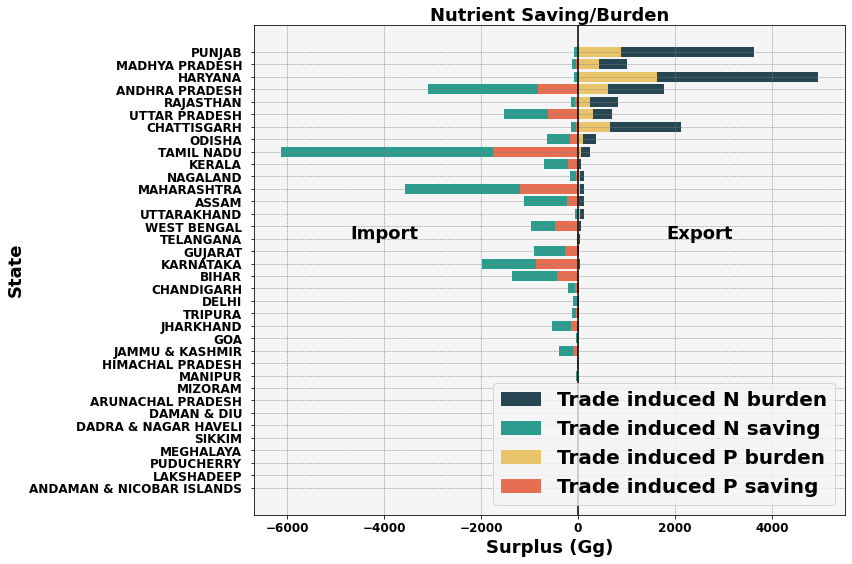

In [84]:
#combined rice and wheat 

import matplotlib.pyplot as plt
data1 = unpivoted_df_Rice_qtl
#unpivoted_df_wheat_qtl[['source', 'target', 'N_surplus_source_w', 'N_surplus_target_w', 'P_surplus_source_w', 'P_surplus_target_w']
data1['N_surplus_source_r_w']=data1['N_surplus_source_r']+unpivoted_df_wheat_qtl['N_surplus_source_w']
data1['N_surplus_target_r_w']=data1['N_surplus_target_r']+unpivoted_df_wheat_qtl['N_surplus_target_w']
data1['P_surplus_target_r_w']=data1['P_surplus_target_r']+unpivoted_df_wheat_qtl['P_surplus_target_w']
data1['P_surplus_source_r_w']=data1['P_surplus_source_r']+unpivoted_df_wheat_qtl['P_surplus_source_w']
data = data1[['source', 'target', 'N_surplus_source_r_w', 'N_surplus_target_r_w','P_surplus_target_r_w','P_surplus_source_r_w']]

# Divide values by 1,000,000
data['N_surplus_source_r_w'] /= 1000000   # converting kg to gigagram 
data['N_surplus_target_r_w'] /= 1000000
data['P_surplus_target_r_w'] /= 1000000
data['P_surplus_source_r_w'] /= 1000000

# Remove zero values
#data = data[(data['N_surplus_source_r_w'] != 0) & (data['N_surplus_target_r_w'] != 0)]  

grouped_data = data.groupby('source').sum()
grup_2 = data.groupby('target').sum()

#grouped_data = grouped_data[(grouped_data['N_surplus_source_r_w'] != 0)]
#grup_2 = grup_2[(grup_2['N_surplus_source_r_w'] != 0)]

# Sort the data based on N_surplus_source_r
grouped_data = grouped_data.sort_values('P_surplus_target_r_w')

# Set the figure size and font properties
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

# Set the background color
plt.rcParams['axes.facecolor'] = 'whitesmoke'

# Plot the export (N_surplus_source_r) on the left side
plt.barh(grouped_data.index, grouped_data['N_surplus_source_r_w'], color='#264653', label='Trade induced N burden')

# Plot the import (N_Target_source_r) on the right side
plt.barh(grup_2.index, -grup_2['N_surplus_target_r_w'], color='#2A9D8F', label='Trade induced N saving')

# Plot the export (P_surplus_source_w) on the left side
plt.barh(grouped_data.index, grouped_data['P_surplus_source_r_w'], color='#E9C46A', label='Trade induced P burden')

# Plot the import (P_surplus_target_w) on the right side
plt.barh(grup_2.index, -grup_2['P_surplus_target_r_w'], color='#E76F51', label='Trade induced P saving')

# Set labels and title
plt.xlabel('Surplus (Gg)', fontweight='bold', fontsize=18)
plt.ylabel('State', fontweight='bold', fontsize=18)
plt.title('Nutrient Saving/Burden',  va='center',fontweight='bold', fontsize=18)

# Display a legend with bold font
plt.legend(loc='lower right', prop={'size': 20})
# Add a black middle line
plt.axvline(color='black')


# Add a grid
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray',zorder=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray',zorder=0)

# Add "Import" text on the left side of the x-axis
plt.text(-4000, 20, 'Import', fontweight='bold', color='black', ha='center', fontsize=18)

# Add "Export" text on the right side of the x-axis
plt.text(2500, 20, 'Export', fontweight='bold', color='black', ha='center', fontsize=18)

# Adjust the spacing between the tick labels and the axis
plt.tick_params(axis='y', pad=8)

# Show the plot
plt.tight_layout()

# Save the figure to a file (e.g., PNG, PDF, SVG, etc.)
#plt.savefig(r'E:\nutrient transport\final_figure\f4\combinedRice_wheat_saving_n_p_sum_fig4.png', dpi=600, bbox_inches='tight')

plt.show()
